In [1]:
import matplotlib.pyplot as plt

In [2]:
import config as config

inst = config.Instrument(FoV = 12, dpix = 0.1, spec_FWHM=3.5, 
                         lamRange=[3500,10000], dlam = 2)

from source import * 

src = Sersic(pa=30.0, re=8.0, ba=0.5, index=4.0, 
             redshift = 0.01, total_mag=12.0)

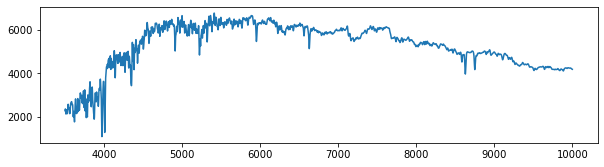

In [3]:
from temp import *
ssp = emiles(FWHM_inst = inst.spec_FWHM)

from sed import *
s=StarPop(ssp, inst.wave, mag = src.total_mag, Age = 6, FeH = -0.5, 
          vel = src.redshift * 300000, vdisp = 180, Ebv = 0)

plt.figure(figsize=(10,2.5))
plt.plot(s.wave, s.flux)
plt.show()

In [4]:
from map2d import *

sbmap=SBMap(src, inst=inst)
kinmap=KinMap(src, inst=inst, curve='tanh', vmax=30, rt=src.re, sigma0=180, gredsigma=-20)
gasmap=GasMap(src, inst=inst, haflux=0)
stellarmap=StellarMap(src, inst=inst, age=7, feh=-0.5, GredZ=0.1, GredAge=-0.1)

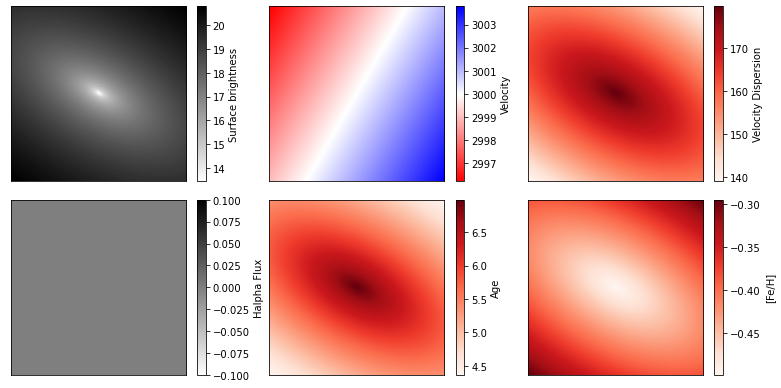

In [5]:
plt.figure(figsize=(11,5.5))
plt.subplot(231)
plt.imshow(sbmap.sb,origin='lower',cmap='gray_r')
plt.colorbar(label='Surface brightness')
plt.xticks([])
plt.yticks([])
plt.subplot(232)
plt.imshow(kinmap.vel,origin='lower',cmap='bwr_r')
plt.colorbar(label='Velocity')
plt.xticks([])
plt.yticks([])
plt.subplot(233)
plt.imshow(kinmap.sigma,origin='lower',cmap='Reds')
plt.colorbar(label='Velocity Dispersion')
plt.xticks([])
plt.yticks([])
plt.subplot(234)
plt.imshow(gasmap.haflux,origin='lower',cmap='gray_r')
plt.colorbar(label='Halpha Flux')
plt.xticks([])
plt.yticks([])
plt.subplot(235)
plt.imshow(stellarmap.age,origin='lower',cmap='Reds')
plt.colorbar(label='Age')
plt.xticks([])
plt.yticks([])
plt.subplot(236)
plt.imshow(stellarmap.feh,origin='lower',cmap='Reds')
plt.colorbar(label='[Fe/H]')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [6]:
from cube3d import *
cube=Cube3d(src, inst, ssp, sbmap, kinmap, gasmap, stellarmap)

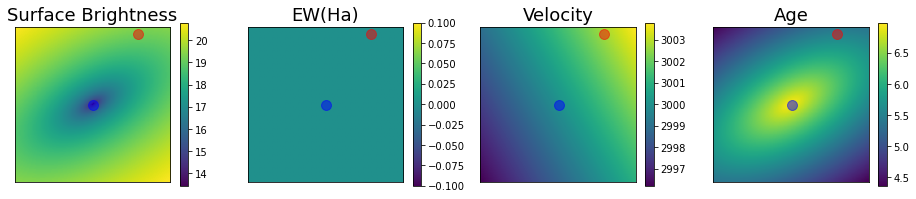

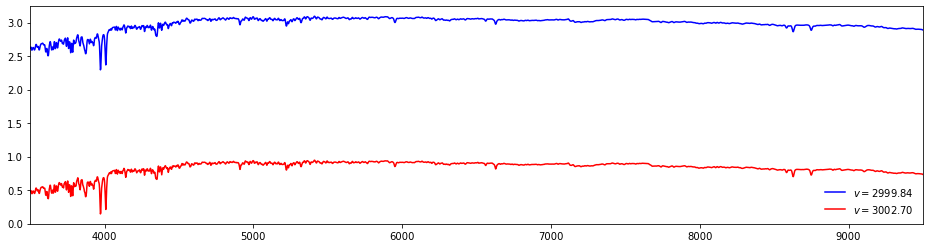

[751 752 753 754 755 756 757 758 759 760 761 762 763 764 765 766 767 768
 769 770 771 772 773 774]


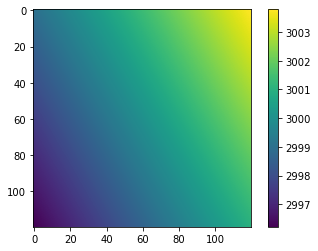

6940


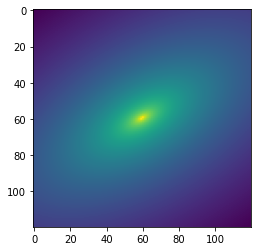

7012


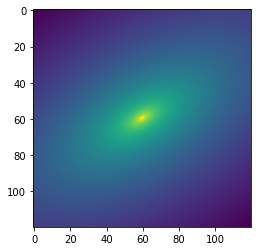

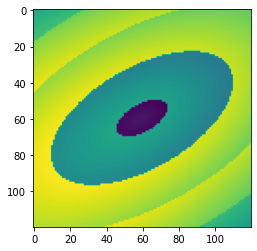

In [13]:
idx=np.logical_and(cube.wave>6500,cube.wave<6600)

plt.figure(figsize=(16,3))
plt.subplot(141)
plt.imshow(sbmap.sb)
plt.colorbar()
plt.scatter([60],[60],s=100,color='blue',alpha=0.5)
plt.scatter([95],[5],s=100,color='red',alpha=0.5)
plt.xticks([])
plt.yticks([])
plt.title('Surface Brightness',fontsize=18)
plt.subplot(142)
plt.imshow(gasmap.haflux)
plt.colorbar()
plt.scatter([60],[60],s=100,color='blue',alpha=0.5)
plt.scatter([95],[5],s=100,color='red',alpha=0.5)
plt.xticks([])
plt.yticks([])
plt.title('EW(Ha)',fontsize=18)
plt.subplot(143)
plt.imshow(kinmap.vel)
plt.colorbar()
plt.scatter([60],[60],s=100,color='blue',alpha=0.5)
plt.scatter([95],[5],s=100,color='red',alpha=0.5)
plt.xticks([])
plt.yticks([])
plt.title('Velocity',fontsize=18)
plt.subplot(144)
plt.imshow(stellarmap.age)
plt.colorbar()
plt.scatter([60],[60],s=100,color='blue',alpha=0.5)
plt.scatter([95],[5],s=100,color='red',alpha=0.5)
plt.xticks([])
plt.yticks([])
plt.title('Age',fontsize=18)
plt.show()

plt.figure(figsize=(16,4))
plt.plot(cube.wave,np.log10(cube.flux[60,60,:]),color='blue',label=r'$v=%4.2f$'%(kinmap.vel[50,50]))
plt.plot(cube.wave,np.log10(cube.flux[5,95,:]),color='red',label=r'$v=%4.2f$'%(kinmap.vel[5,95]))
plt.xlim(3500,9500)
plt.legend(frameon=False)
plt.show()

print(np.arange(len(cube.wave))[np.logical_and(cube.wave>5000,cube.wave<5050)])

plt.imshow(kinmap.vel)
plt.colorbar()
plt.show()

print(cube.wave[1720])
plt.imshow(np.log10(cube.flux[:,:,1720]))
plt.show()

print(cube.wave[1756])
plt.imshow(np.log10(cube.flux[:,:,1756]))
plt.show()

plt.imshow(np.log10(cube.flux[:,:,1720])-np.log10(cube.flux[:,:,1756]))
plt.show()